<a href="https://colab.research.google.com/github/uzFer/APS360-Project/blob/main/baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import imageio.v2 as imageio
from scipy import ndimage
import os
import cv2
from PIL import Image

In [ ]:
# Function to convert RGB image to grayscale
def RGB2Gray(image):
    return np.dot(image[..., :3], [0.2989, 0.5870, 0.1140])

# Function to compute the gradient along the x-axis
def gradient_x(image):
    grad_image = ndimage.convolve(image, np.array([[-1, 0, 1],
                                                   [-2, 0, 2],
                                                   [-1, 0, 1]]))
    return grad_image / np.max(grad_image)

# Function to compute the gradient along the y-axis
def gradient_y(image):
    # Sobel filter
    grad_image = ndimage.convolve(image, np.array([[-1, -2, -1],
                                                   [0, 0, 0],
                                                   [1, 2, 1]]))
    return grad_image / np.max(grad_image)

# Function to compute the gradient magnitude
def gradient_magnitude(fx, fy):
    grad_magnitude = np.hypot(fx, fy)
    return grad_magnitude / np.max(grad_magnitude)

In [ ]:
# Function to determine the closest gradient direction for each pixel
def closest_dir(grad_direction):
    closest_dir_arr = np.zeros(grad_direction.shape)

    for i in range(1, int(grad_direction.shape[0] - 1)):
        for j in range(1, int(grad_direction.shape[1] - 1)):

            # Determine the closest direction based on the gradient angle
            if((grad_direction[i, j] > -22.5 and grad_direction[i, j] <= 22.5) or
                (grad_direction[i, j] <= -157.5 and grad_direction[i, j] > 157.5)):
                closest_dir_arr[i, j] = 0

            elif((grad_direction[i, j] > 22.5 and grad_direction[i, j] <= 67.5) or
                (grad_direction[i, j] <= -112.5 and grad_direction[i, j] > -157.5)):
                closest_dir_arr[i, j] = 45

            elif((grad_direction[i, j] > 67.5 and grad_direction[i, j] <= 112.5) or
                (grad_direction[i, j] <= -67.5 and grad_direction[i, j] > -112.5)):
                closest_dir_arr[i, j] = 90

            else:
                closest_dir_arr[i, j] = 135

    return closest_dir_arr

In [ ]:
# Function to perform non-maximal suppression on the grad magnitude
def non_max_suppressor(grad_magnitude, closest_dir):
    thin_line_output = np.zeros(grad_magnitude.shape)

    for i in range(1, int(grad_magnitude.shape[0] - 1)):
        for j in range(1, int(grad_magnitude.shape[1] - 1)):
            if(closest_dir[i, j] == 0):
                if((grad_magnitude[i, j] > grad_magnitude[i, j + 1]) and (grad_magnitude[i, j] > grad_magnitude[i, j - 1])):
                    thin_line_output[i, j] = grad_magnitude[i, j]
                else:
                    thin_line_output[i, j] = 0

            elif(closest_dir[i, j] == 45):
                if((grad_magnitude[i, j] > grad_magnitude[i + 1, j + 1]) and (grad_magnitude[i, j] > grad_magnitude[i - 1, j - 1])):
                    thin_line_output[i, j] = grad_magnitude[i, j]
                else:
                    thin_line_output[i, j] = 0

            elif(closest_dir[i, j] == 90):
                if((grad_magnitude[i, j] > grad_magnitude[i + 1, j]) and (grad_magnitude[i, j] > grad_magnitude[i - 1, j])):
                    thin_line_output[i, j] = grad_magnitude[i, j]
                else:
                    thin_line_output[i, j] = 0

            else:
                if((grad_magnitude[i, j] > grad_magnitude[i + 1, j - 1]) and (grad_magnitude[i, j] > grad_magnitude[i - 1, j + 1])) :
                    thin_line_output[i, j] = grad_magnitude[i, j]
                else:
                    thin_line_output[i, j] = 0

    return thin_line_output / np.max(thin_line_output)

In [ ]:
def hysteresis_thresholding(image):
    t_low = 0.15
    t_high = 0.2
    diff = np.max(image) - np.min(image)
    threshold_low = np.min(image) + t_low * diff
    threshold_high = np.min(image) + t_high * diff

    strong_edges = (image >= threshold_high)
    weak_edges = (image >= threshold_low) & (image < threshold_high)

    # Final output image
    final_output = strong_edges.astype(np.uint8) * 2 + weak_edges.astype(np.uint8)

    return final_output

    # low_ratio = 0.10
    # high_ratio = 0.30
    # diff = np.max(image) - np.min(image)
    # t_low = np.min(image) + low_ratio * diff
    # t_high = np.min(image) + high_ratio * diff

    # temp_image = np.copy(image)

    # for i in range(1, int(image.shape[0] - 1)):
    #     for j in range(1, int(image.shape[1] - 1)):
    #         if(image[i, j] > t_high):
    #             temp_image[i, j] = 2
    #         elif(image[i, j] < t_low):
    #             temp_image[i, j] = 0
    #         else:
    #             temp_image[i, j] = 1

    # total_strong = np.sum(temp_image == 2)

    # while(1):
    #     DFS(temp_image)
    #     if(total_strong == np.sum(temp_image == 2)):
    #         break
    #     total_strong = np.sum(temp_image == 2)

    # for i in range(1, int(temp_image.shape[0] - 1)):
    #     for j in range(1, int(temp_image.shape[1] - 1)):
    #         if(temp_image[i, j] == 1):
    #             temp_image[i, j] = 0

    # temp_image = temp_image / np.max(temp_image)
    # return temp_image

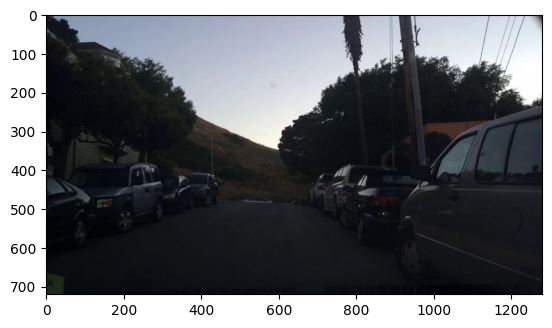

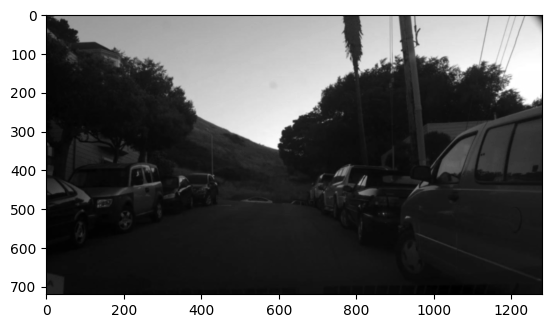

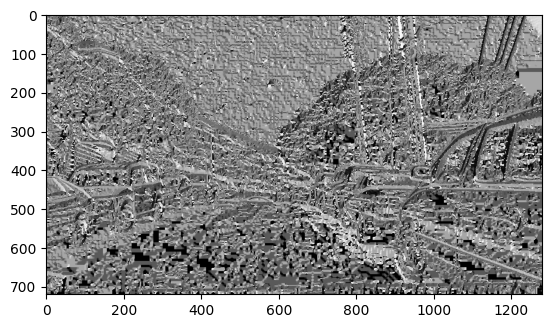

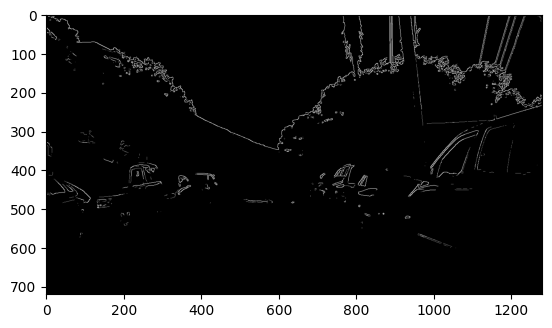

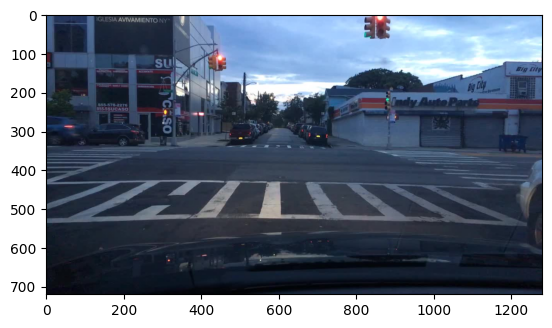

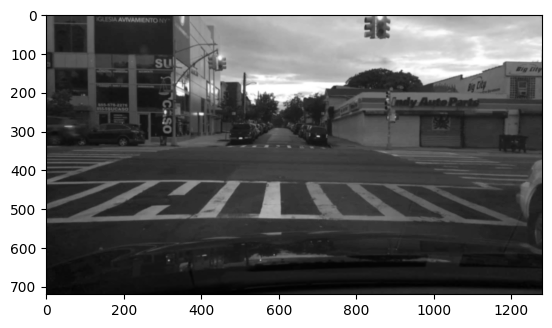

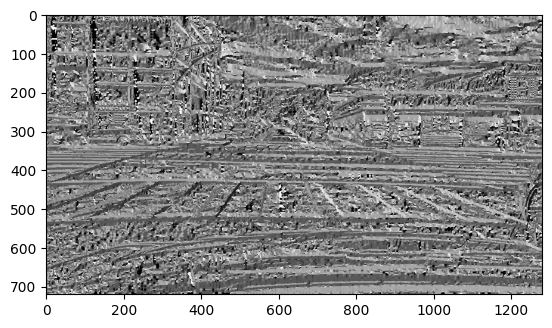

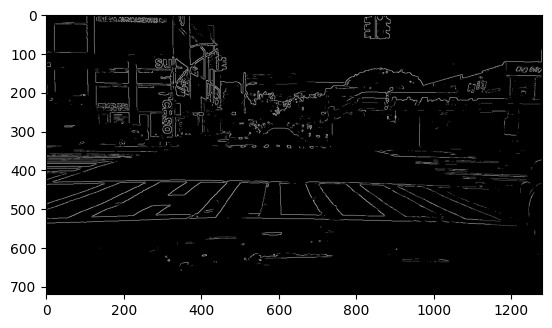

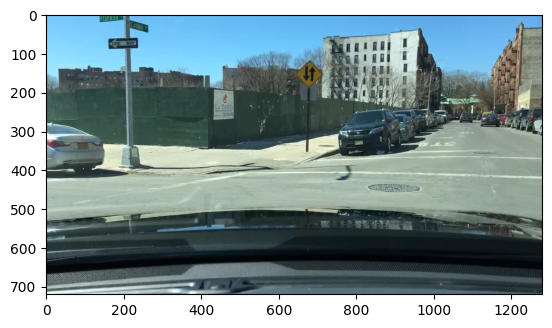

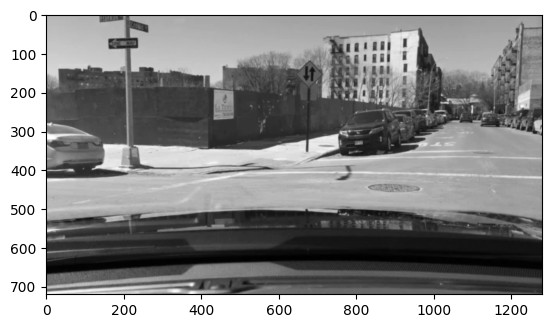

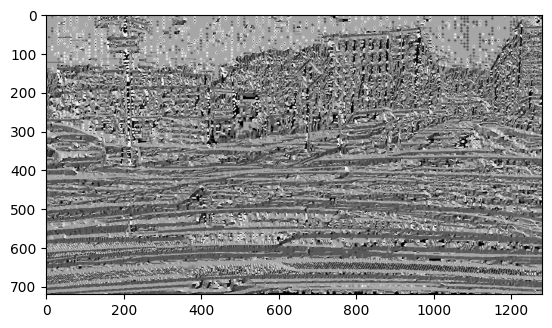

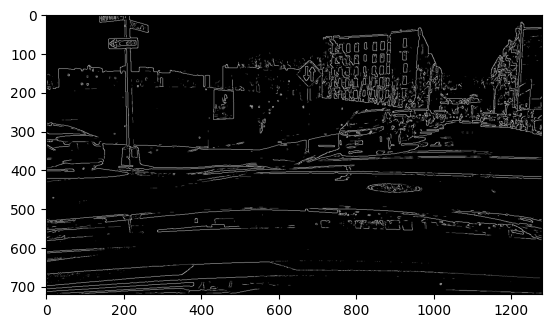

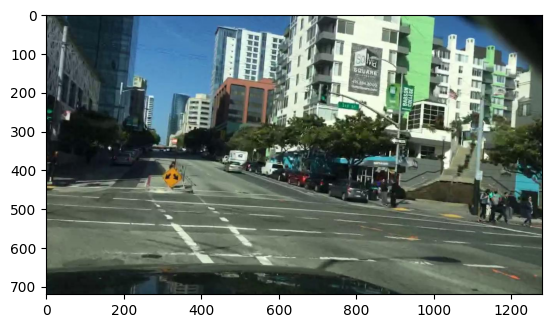

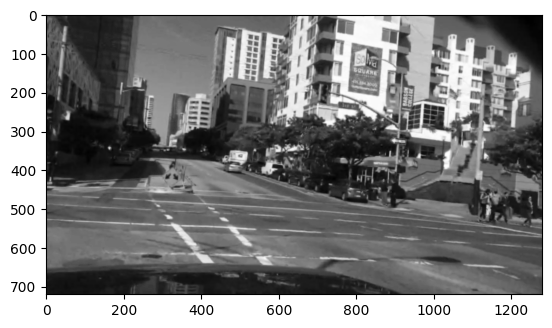

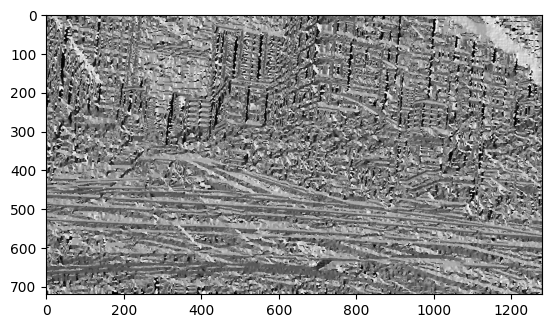

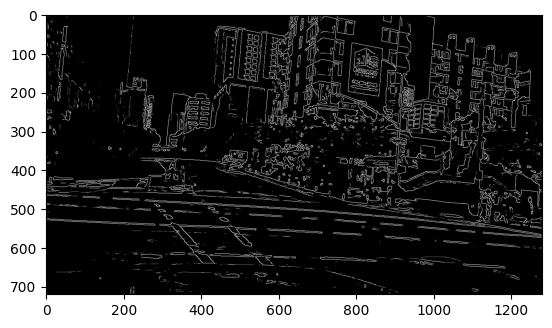

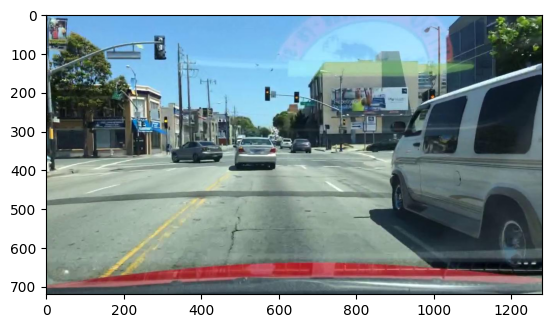

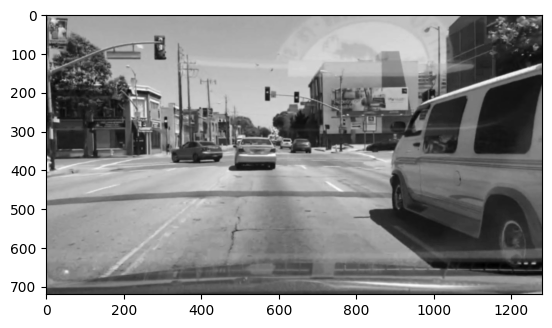

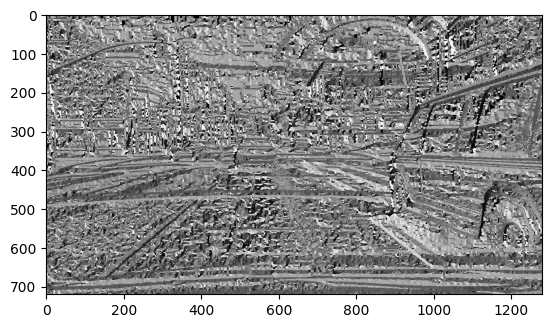

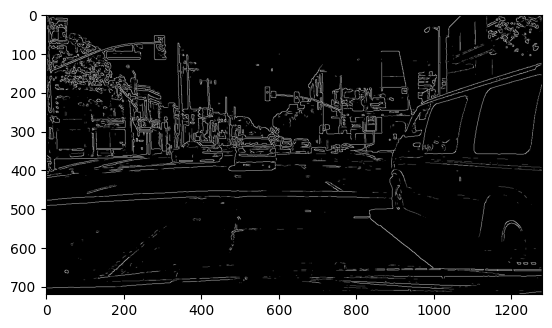

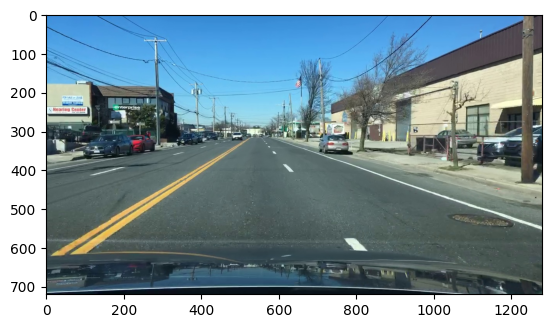

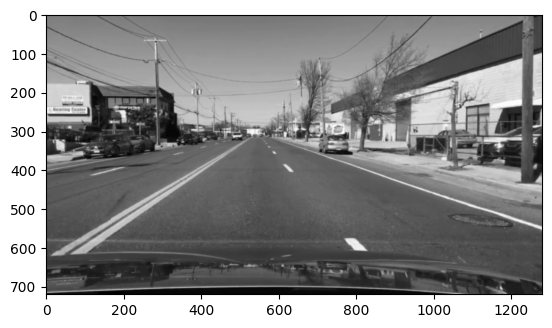

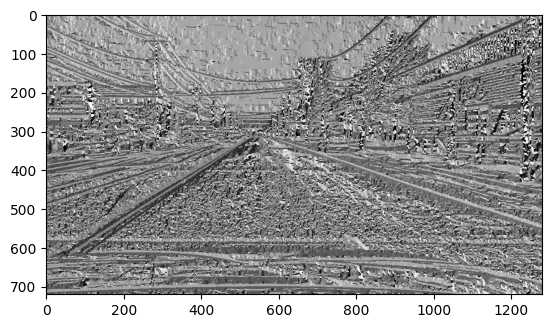

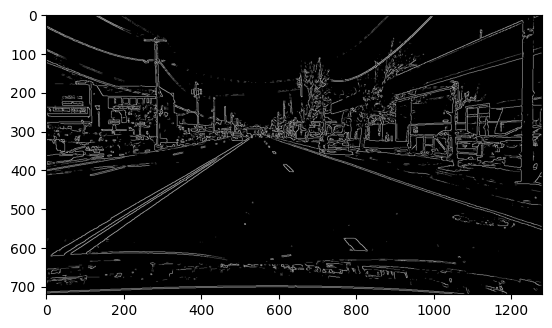

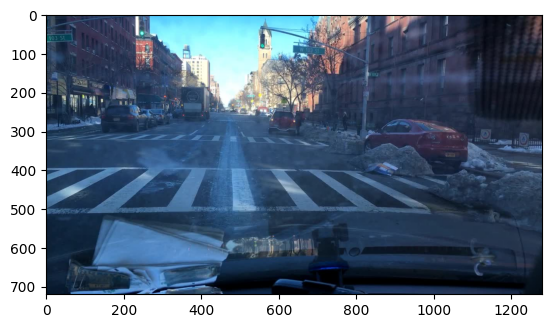

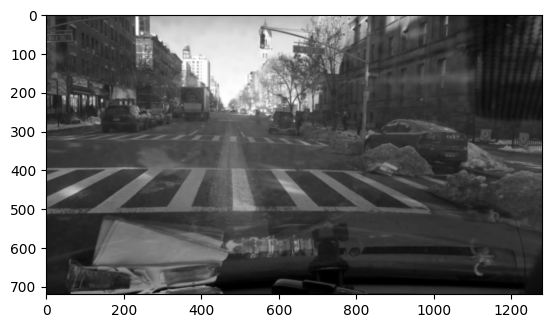

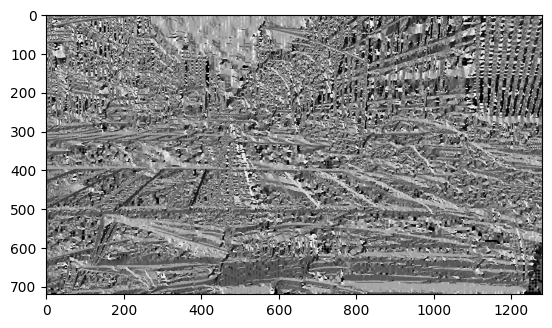

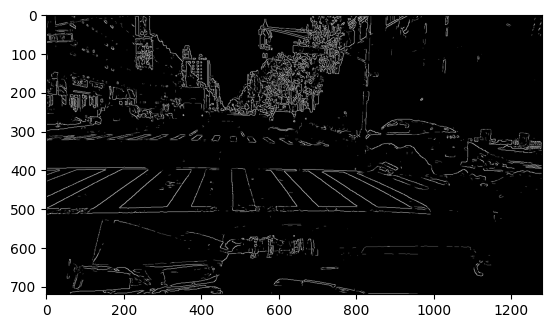

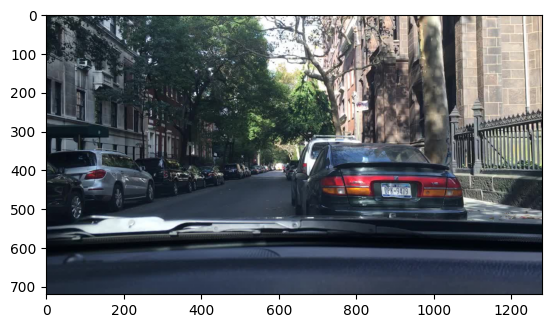

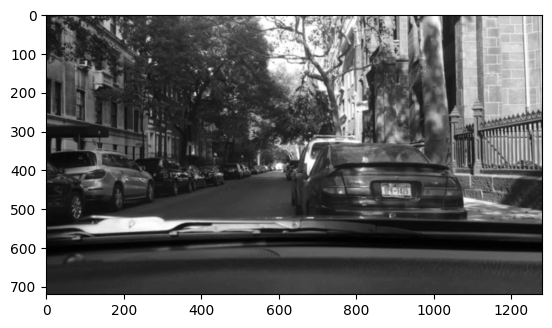

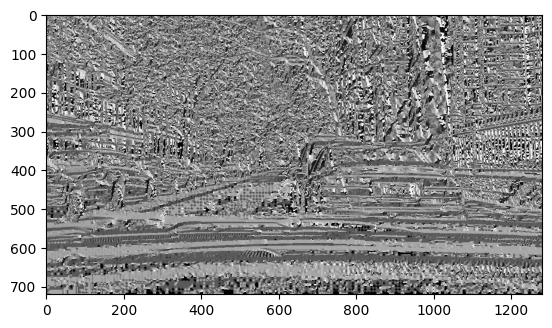

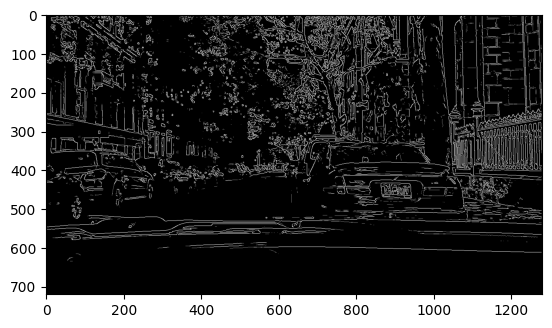

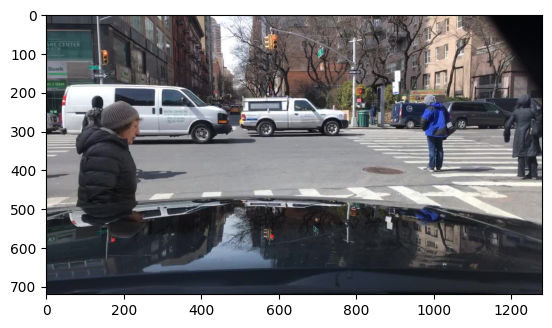

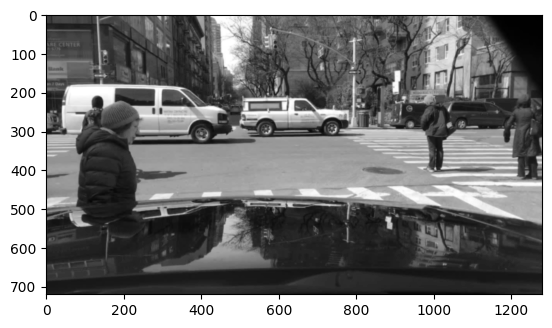

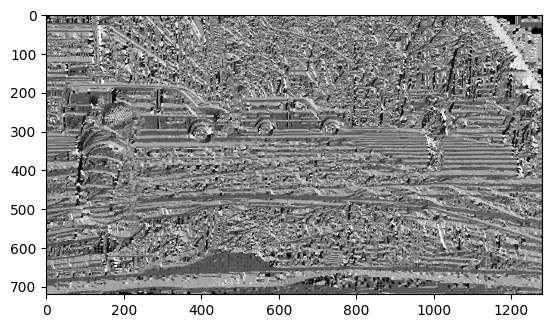

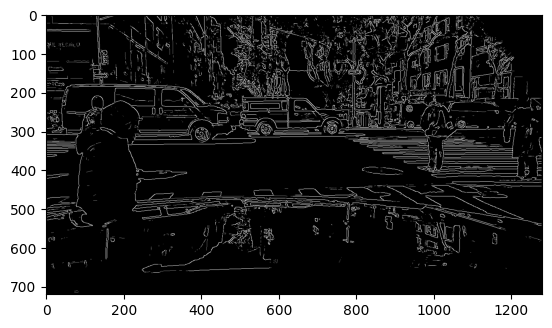

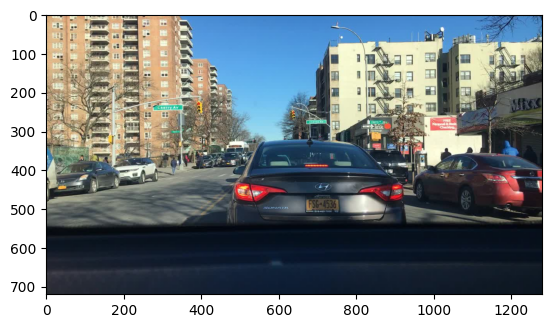

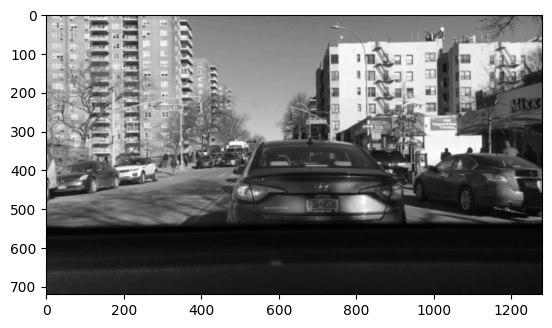

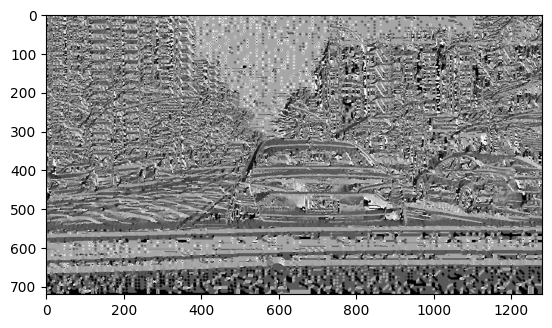

KeyboardInterrupt: ignored

In [ ]:
output_path = "/content/drive/MyDrive/test_output/"
folder_path = "/content/drive/MyDrive/images/"
image_names = [file for file in os.listdir(folder_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

for image in image_names:
    input_image = imageio.imread(folder_path + image)
    plt.imshow(input_image)
    plt.show()
    gray_input_image = RGB2Gray(input_image)
    blur_image = ndimage.gaussian_filter(gray_input_image, sigma = 1.0)

    x_grad = gradient_x(blur_image)
    y_grad = gradient_y(blur_image)

    plt.imshow(blur_image, cmap='gray')
    plt.show()
    grad_mag = gradient_magnitude(x_grad, y_grad)
    grad_mag_pil = Image.fromarray(np.uint8(grad_mag))

    grad_dir = np.degrees(np.arctan2(y_grad, x_grad))
    grad_dir_pil = Image.fromarray(np.uint8(grad_dir))
    plt.imshow(grad_dir_pil, cmap='gray')
    plt.show()
    closest_direction = closest_dir(grad_dir)
    thin_line_output = non_max_suppressor(grad_mag, closest_direction)
    thinned_output_pil = Image.fromarray(np.uint8(thin_line_output))

    output_image = hysteresis_thresholding(thin_line_output)
    final_output_pil = Image.fromarray(np.uint8(output_image))
    plt.imshow(output_image, cmap='gray')
    plt.show()
    cv2.imwrite(output_path + "/" + image.split(".")[0] + ".jpg", (output_image * 255).astype(np.uint8))

In [ ]:
def evaluate_edge_detection(gt_image, canny_output):
  # Ensure images have the same dimensions
  if(gt_image.shape == canny_output.shape):
    # Convert images to binary format (in case they are grayscale)
    _, gt_binary = cv2.threshold(gt_image, 127, 255, cv2.THRESH_BINARY)
    _, canny_binary = cv2.threshold(canny_output, 127, 255, cv2.THRESH_BINARY)

    # True positives: Pixels that are edges in both ground truth and Canny output
    tp = np.sum(np.logical_and(gt_binary == 255, canny_binary == 255))

    # False positives: Pixels that are edges in Canny output but not in ground truth
    fp = np.sum(np.logical_and(gt_binary == 0, canny_binary == 255))

    # False negatives: Pixels that are edges in ground truth but not in Canny output
    fn = np.sum(np.logical_and(gt_binary == 255, canny_binary == 0))


  precision = tp / (tp + fp)
  recall = tp / (tp + fn)
  f1 = 2 * (precision * recall) / (precision + recall)

  return tp, tn, fp, fn, precision, recall, f1

def calculate_iou(gt_mask, canny_mask):
  # Convert the masks to binary format if they are not already
  gt_mask = (gt_mask > 0).astype(np.uint8)
  canny_mask = (canny_mask > 0).astype(np.uint8)

  # Calculate the coordinates of the intersection
  intersection = np.logical_and(gt_mask, canny_mask)

  # Calculate the areas
  area_gt = np.sum(gt_mask)
  area_canny = np.sum(canny_mask)
  area_intersection = np.sum(intersection)

  # Calculate IoU
  iou = area_intersection / (area_gt + area_canny - area_intersection) if (area_gt + area_canny - area_intersection) > 0 else 0.0

  return iou

def calculate_dice_coefficient(gt_mask, canny_mask):
    gt_mask = (gt_mask > 0).astype(np.uint8)
    canny_mask = (canny_mask > 0).astype(np.uint8)

    intersection = np.logical_and(gt_mask, canny_mask)
    area_gt = np.sum(gt_mask)
    area_canny = np.sum(canny_mask)
    area_intersection = np.sum(intersection)

    dice_coefficient = (2.0 * area_intersection) / (area_gt + area_canny) if (area_gt + area_canny) > 0 else 0.0

    return dice_coefficient

In [ ]:
gt_path = "/content/drive/MyDrive/groundtruth/" # replace path here with folder with ground truth
input_path = "/content/drive/MyDrive/images/" # replace path here with folder with input images
image_names = [file for file in os.listdir(input_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

total_tp = 0
total_tn = 0
total_fp = 0
total_fn = 0
total_precision = 0
total_recall = 0
total_f1 = 0
total_iou = 0
total_dice = 0

for image in image_names:
    input_image = imageio.imread(input_path + image)
    gt_image = imageio.imread(gt_path + image)

    tp, tn, fp, fn, precision, recall, f1 = evaluate_edge_detection(gt_image, input_image)
    iou_score = calculate_iou(gt_image, input_image)
    dice_score = calculate_dice_coefficient(gt_image, input_image)
    total_tp += tp
    total_tn += tn
    total_fp += fp
    total_fn += fn
    total_precision += precision
    total_recall += recall
    total_f1 += f1
    total_iou += iou_score
    total_dice += dice_score

avg_tp = total_tp / (len(image_names) * 720 * 1280)
avg_tn = total_tn / (len(image_names) * 720 * 1280)
avg_fp = total_fp / (len(image_names) * 720 * 1280)
avg_fn = total_fn / (len(image_names) * 720 * 1280)
avg_precision = total_precision / len(image_names)
avg_recall = total_recall / len(image_names)
avg_f1 = total_f1 / len(image_names)
avg_iou = total_iou / len(image_names)
avg_dice = total_dice / len(image_names)

print("TP: ", avg_tp)
print("TN: ", avg_tn)
print("FP: ", avg_fp)
print("FN: ", avg_fn)
print("Precision: ", avg_precision)
print("Recall: ", avg_recall)
print("F1 Score: ", avg_f1)
print("Intersection over Union (IoU):", avg_iou)
print("Dice Coefficient:", avg_dice)